https://docs.google.com/spreadsheets/d/1O91FqX_t0jlIpiByqjYuk8OpzHXWB9NnaZsvjgDKCEk/edit#gid=0
!pip install gspread oauth2client

# 2

In [1]:
import pandas
資料 = pandas.read_excel("./0050.xlsx")

In [2]:
資料

,日期,開盤價,最高價,最低價,收盤價
0,2020/01/02,97.05,98.00,97.05,97.65
1,2020/01/03,98.30,98.70,97.00,97.65
2,2020/01/06,97.05,97.10,96.40,96.40
3,2020/01/07,96.45,96.70,95.40,96.10
4,2020/01/08,95.20,96.20,95.05,95.65
...,...,...,...,...,...
686,2022/10/25,98.60,98.60,96.50,96.70
687,2022/10/26,96.85,98.00,96.50,97.60
688,2022/10/27,98.50,99.35,98.50,99.00
689,2022/10/28,98.60,98.60,97.25,97.75


# 3 、 4

In [3]:
資料 = 資料.set_index('日期')
資料.index = pandas.to_datetime(資料.index)

In [4]:
資料

,開盤價,最高價,最低價,收盤價
日期,,,,
2020-01-02,97.05,98.00,97.05,97.65
2020-01-03,98.30,98.70,97.00,97.65
2020-01-06,97.05,97.10,96.40,96.40
2020-01-07,96.45,96.70,95.40,96.10
2020-01-08,95.20,96.20,95.05,95.65
...,...,...,...,...
2022-10-25,98.60,98.60,96.50,96.70
2022-10-26,96.85,98.00,96.50,97.60
2022-10-27,98.50,99.35,98.50,99.00


# 5

In [5]:
資料_2022 = 資料.loc['20220101':'20221031']

In [6]:
資料_2022

,開盤價,最高價,最低價,收盤價
日期,,,,
2022-01-03,146.00,147.35,146.00,146.40
2022-01-04,147.70,149.60,147.70,149.60
2022-01-05,150.10,150.55,149.10,149.30
2022-01-06,148.30,148.75,147.00,147.90
2022-01-07,148.30,149.00,146.50,146.60
...,...,...,...,...
2022-10-25,98.60,98.60,96.50,96.70
2022-10-26,96.85,98.00,96.50,97.60
2022-10-27,98.50,99.35,98.50,99.00


# 6

In [7]:
資料_2022['報酬率']=(資料_2022['收盤價'].diff() / 資料_2022['收盤價'])

<ipython-input-7-01e4a92cc137>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  資料_2022['報酬率']=(資料_2022['收盤價'].diff() / 資料_2022['收盤價'])


In [8]:
資料_2022

,開盤價,最高價,最低價,收盤價,報酬率
日期,,,,,
2022-01-03,146.00,147.35,146.00,146.40,NaN
2022-01-04,147.70,149.60,147.70,149.60,0.021390
2022-01-05,150.10,150.55,149.10,149.30,-0.002009
2022-01-06,148.30,148.75,147.00,147.90,-0.009466
2022-01-07,148.30,149.00,146.50,146.60,-0.008868
...,...,...,...,...,...
2022-10-25,98.60,98.60,96.50,96.70,-0.019648
2022-10-26,96.85,98.00,96.50,97.60,0.009221
2022-10-27,98.50,99.35,98.50,99.00,0.014141


# 7

<AxesSubplot:ylabel='Frequency'>

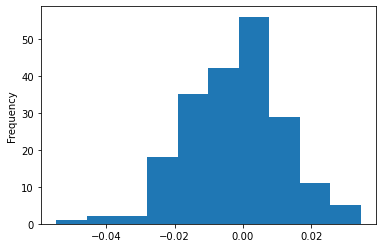

In [9]:
資料_2022['報酬率'].plot(kind='hist')

# 8

In [10]:
資料_2022.to_excel("./0050_2022.xlsx")

# 9

In [11]:
import gspread 
from oauth2client.service_account import ServiceAccountCredentials

In [12]:
auth_json = "testgs.json"
gs_sope = ["https://spreadsheets.google.com/feeds"]
perm_set = ServiceAccountCredentials.from_json_keyfile_name(auth_json)
gc = gspread.authorize(perm_set)
tablename = '1O91FqX_t0jlIpiByqjYuk8OpzHXWB9NnaZsvjgDKCEk'
gsheet = gc.open_by_key(tablename)

In [13]:
sheet1 = gsheet.worksheet('工作表1')
sheet1.clear()
body = list(資料_2022.columns)
sheet1.insert_row(body,1)

{'spreadsheetId': '1O91FqX_t0jlIpiByqjYuk8OpzHXWB9NnaZsvjgDKCEk',
 'updates': {'spreadsheetId': '1O91FqX_t0jlIpiByqjYuk8OpzHXWB9NnaZsvjgDKCEk',
  'updatedRange': "'工作表1'!A1:E1",
  'updatedRows': 1,
  'updatedColumns': 5,
  'updatedCells': 5}}

# 10

In [14]:
body = list(資料_2022.loc['2022-03'].values)
for i in body:
    sheet1.append_row(list(i))